## NE-FGR for Brownian Oscillators Model

This tutorial will demonstrate how the FGR module can be used for rate calculations

Based on `/tests/test_fgr/test_nefgr_brownian_all.py`

In [1]:
import sys
import cmath
import math
import os

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import units
from libra_py import fgr_py

fs = units.fs2au
kB = units.kB

/home/alexvakimov/SOFTWARE/Conda/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexvakimov/SOFTWARE/Conda/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexvakimov/SOFTWARE/Conda/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vect

In [2]:
w_c = 1.0

# Time below is in units of w_c: hbar * w_c = 1
tmax = 20.0
dt = 0.20
dtau = dt/50.0


gamma = 0.1  # [gamma] = hbar * w_c <- energy unitsm , Eq. 46, the lower-case gamma ; [Energy]/[length]
nomega = 500 # the number of oscillators/modes, Eq. 50, N
dw = 15.0*w_c/float(nomega)  # delta \omega in Eq. 62; non-equidistant in realistic systems; 

In [3]:
for dyn_type in [0, 1]:  # Condon (0) vs. non-Condon (1)    
    for method in [0, 1, 2, 3, 4, 5]:  #  All methods
        
        i1 = -1
        for w_DA in [0.0]: #[0.0, 2.0]:   # Donor-Acceptor energy gap, a.u. = Ha, Eq. 50
            i1 += 1
            i2 = -1
            for s in [-1.0]: # -1.0, 1.0, 3.0]:   # Noneq. initial shift of primary mode, [length, in reduced units]
                i2 += 1
                i3 = -1
                for beta in [1.0]: #, 2.0, 5.0]:   # themal energy, 1/(kB*T), Ha^-1
                    i3 += 1
                    i4 = -1
                    for etha in [0.5]: #, 1.0, 2.0]:  # friction, Eq. 45
                        i4 += 1

                        print("-----------------------")
                        print("w_DA = ", w_DA)
                        print("s = ", s)
                        print("beta = ", beta)
                        T = 1.0/(beta*kB)
                        print("Temperature = ", T, " K")
                        print("etha = ", etha)
        
                        #============ Setup the parameters ===============        
                        params = {}
                        params["Er"] = 0.5 * w_c   # right under Eq. 62
                        params["omega_DA"] = w_DA * w_c # units conversion for energy
                        params["omega"] = [0.5*w_c] # right under Eq. 62 too
                        params["coup"] = [0.0]  # ??            
        
                        for a in range(1, nomega):
                            w_a = a*dw
                            params["omega"].append(w_a)
        
                            J_a = etha * w_a * math.exp(-w_a/w_c)      # Eq. 45
                            c_a = math.sqrt((2.0/math.pi)*J_a*w_a*dw)  # Eq. 62
                            params["coup"].append(c_a)
        
                        #============ Setup the parameters =============== 
                        ndof = len(params["omega"])
                        print("ndof = ", ndof)
                        omega = Py2Cpp_double(params["omega"])
                        coeff = Py2Cpp_double(params["coup"])
        
                        U = MATRIX(ndof, ndof)
                        omega_nm = normal_modes(omega, coeff, U)
                        #print "U = "; U.show_matrix()
        
                        dE = params["omega_DA"]
        
                        print("Omega = ", params["omega"][0])
                        print("Er = ", params["Er"])
                        y0 = eq_shift(params["Er"], params["omega"][0])
                        print("y0 = ", y0)
        
                        req_nm = compute_req(omega, coeff, y0, U)
                        #print "req_nm = ", Cpp2Py(req_nm)
        
                        gamma_nm = compute_TT_scaled(U, gamma)
                        #print "gamma_nm = ", Cpp2Py(gamma_nm)
        
                        shift_NE = compute_TT_scaled(U, s)
                        #print "shift_NE = ", Cpp2Py(shift_NE)
        
                        # In condon, V is fixed - that's Condon; V = V(q) - non-Condon;
                        V = coupling_Condon(gamma, dE, params["Er"], y0)
                        print("V = ", V)
                
                        #omega_DA, V, omega_nm, gamma_nm, req_nm, shift_NE, params
                    
                        params.update({ "tmax": tmax, "dt":dt, "dtau":dtau, "method":method, "dyn_type":dyn_type, 
                                        "Temperature":T, "do_output":True, 
                                        "filename": "_res-%i-%i-%i-%i-%i-%i.txt" % (dyn_type, method, i1,i2,i3,i4) 
                                      })
        
                        fgr_py.run_NEFGRL_populations(params["omega_DA"], V, omega_nm, gamma_nm, req_nm, shift_NE, params )
        

-----------------------
w_DA =  0.0
s =  -1.0
beta =  1.0
Temperature =  315774.6670514614  K
etha =  0.5
ndof =  500
Omega =  0.5
Er =  0.5
y0 =  1.0
V =  0.1
-----------------------
w_DA =  0.0
s =  -1.0
beta =  1.0
Temperature =  315774.6670514614  K
etha =  0.5
ndof =  500
Omega =  0.5
Er =  0.5
y0 =  1.0
V =  0.1
-----------------------
w_DA =  0.0
s =  -1.0
beta =  1.0
Temperature =  315774.6670514614  K
etha =  0.5
ndof =  500
Omega =  0.5
Er =  0.5
y0 =  1.0
V =  0.1
-----------------------
w_DA =  0.0
s =  -1.0
beta =  1.0
Temperature =  315774.6670514614  K
etha =  0.5
ndof =  500
Omega =  0.5
Er =  0.5
y0 =  1.0
V =  0.1
-----------------------
w_DA =  0.0
s =  -1.0
beta =  1.0
Temperature =  315774.6670514614  K
etha =  0.5
ndof =  500
Omega =  0.5
Er =  0.5
y0 =  1.0
V =  0.1
-----------------------
w_DA =  0.0
s =  -1.0
beta =  1.0
Temperature =  315774.6670514614  K
etha =  0.5
ndof =  500
Omega =  0.5
Er =  0.5
y0 =  1.0
V =  0.1
-----------------------
w_DA =  0.0
s = 

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline
import numpy as np
#%matplotlib notebook

In [5]:
x = np.loadtxt("_res-0-0-0-0-0-0.txt")
print(x.shape)

(101, 3)


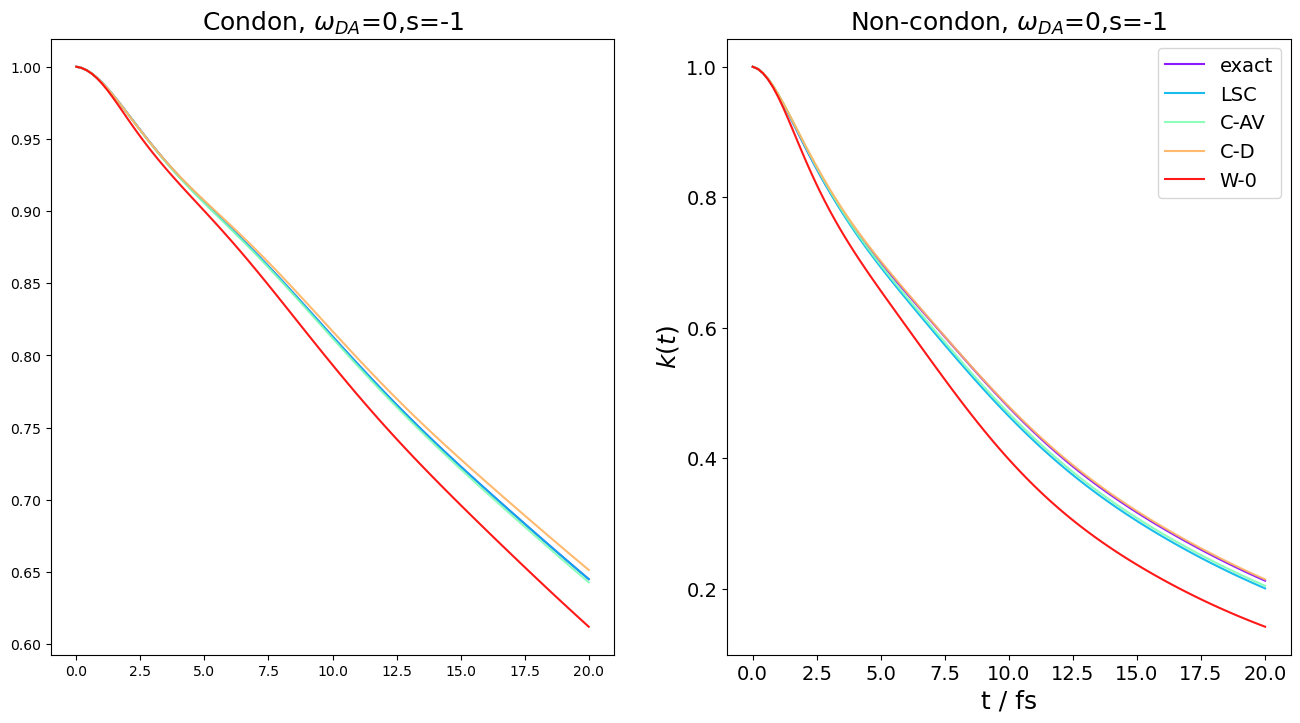

In [6]:
#for 
#x = np.loadtxt(_res-%i-%i-%i-%i-%i-%i.txt)
Nmethods = 5
labellist = ['exact', 'LSC', 'C-AV', 'C-D', 'W-0', 'C-0']
w_da = 0
shift = -1

plt.figure(1, figsize=(16, 8))
color = iter(cm.rainbow(np.linspace(0,1,Nmethods)))

plt.subplot(1,2, 1)
for i in range(Nmethods):    
    #colname = 'k'+str(i)  #plot rates
    c=next(color)
    x = np.loadtxt(F"_res-0-{i}-0-0-0-0.txt")
    plt.plot(x[:,0], x[:,2], c=c, label=labellist[i], alpha=0.9)

plt.title('Condon, $\omega_{DA}$=%s,s=%s' % (w_da, shift), fontsize=18)
    
color = iter(cm.rainbow(np.linspace(0,1,Nmethods)))    
plt.subplot(1,2, 2)
for i in range(Nmethods):    
    #colname = 'k'+str(i)  #plot rates
    c=next(color)
    y = np.loadtxt(F"_res-1-{i}-0-0-0-0.txt")
    plt.plot(y[:,0], y[:,2], c=c, label=labellist[i], alpha=0.9)

plt.title('Non-condon, $\omega_{DA}$=%s,s=%s' % (w_da, shift), fontsize=18)
    
    
plt.legend(fontsize=14)
plt.ylabel(r'$k(t)$', fontsize=18)
plt.xlabel(r't / fs', fontsize=18)
plt.tick_params(labelsize=14)
#plt.ylim(0, 1)
#plt.xlim(0, 20)
plt.show()